# A Step-by-Step tutorial for usage of ISMGCC


This is a tutorial about using the Python implementation of ISMGCC method to find molecular gas structures. 
The input of ISMGCC is a table containing rows of Gaussian components (GCs), which could be created from observational PPV data cubes with Gaussian decomposition methods, e.g., [GaussPy+](https://github.com/mriener/gausspyplus).
For now, we will concentrate on the ISMGCC. 
Therefore, a ready-made [table](https://github.com/Haoran-Feng/ismgcc/blob/main/example/demo-data/GL14_fit_fin_sf-p2_finalize.csv) is provided.

## Table of content

1. Prepare the environment
2. <del>Decompose the input data cube with gausspy+</del> (we might provide a simple example in the future)
3. Use ISMGCC to find structures
4. Run a parameter grid of ISMGCC (under construction)

## Prepare the environment 

It is recommended to use an isolated conda environment for ISMGCC, with the following commands

```bash
conda create -n ismgcc-demo python=3.9
conda activate ismgcc-demo
python -m pip install ismgcc
python -m pip install ipykernel  # if you're running the code in Jupyter 
```
where `ismgcc-demo` is the name of your new environment, which can be anything you like. 


## Use ISMGCC to find structures


In [1]:
# import everything we need
from ismgcc import DecomposedPPVStructureFinder, PostProcess
import pandas as pd
from spectral_cube import SpectralCube
from astropy import units as u
import numpy as np 
from regions import Regions

In [2]:
# set the parameters of ISMGCC
bwc = 0.5
r = 3
snrth0 = 0
snrth1 = 5
db = 0.5
resolution = 0.01
n_process = 4

param_dict = {
    "bandwidth_coef": bwc, 
    "r": r, 
    "snr_th0": snrth0, 
    "snr_th1": snrth1, 
    "decision_boundary": db, 
    "community_resolution": resolution,
    "spatial_distance_threshold": 1.5,
}

# load the input table
input_file = "./demo-data/GL14_fit_fin_sf-p2_finalize.csv"
df = pd.read_csv(input_file)

# initialize the finder and run
finder = DecomposedPPVStructureFinder(df, params=param_dict, n_jobs=n_process)
output_suffix = finder.get_output_suffix()
outdf = finder.find_structures()

# save the output as a csv file
output = f"./demo-results/GL14-{output_suffix}.csv"
outdf.to_csv(output, index=False)

INFO: Start _prepare_kdtree_and_adj_table at Wed Sep  4 14:43:31 2024 [ismgcc.finder]
INFO: No lock file: .cache/ad73f_spatial_distance_threshold1.50_kdtree_and_adj_table.pickle.lock [ismgcc.finder]
INFO: Create lock file: .cache/ad73f_spatial_distance_threshold1.50_kdtree_and_adj_table.pickle.lock [ismgcc.finder]
INFO: Save cached kdtree_and_adj_table file: .cache/ad73f_spatial_distance_threshold1.50_kdtree_and_adj_table.pickle [ismgcc.finder]
INFO: Release lock file: .cache/ad73f_spatial_distance_threshold1.50_kdtree_and_adj_table.pickle.lock [ismgcc.finder]
INFO: Done at Wed Sep  4 14:43:32 2024, elapse time: 1.81 seconds [ismgcc.finder]
INFO: Start _prepare_v_cluster_table at Wed Sep  4 14:43:32 2024 [ismgcc.finder]
INFO: No lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_vcluster_table.arrow.lock [ismgcc.finder]
INFO: Create lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_vcluster_table.arrow.lock [ismgcc.finder]


Run Mean-Shift, r=3: 100%|██████████| 14327/14327 [07:23<00:00, 32.33it/s] 


INFO: Save cached vcluster_table file: .cache/ad73f_bandwidth_coef0.50_r3.00_vcluster_table.arrow [ismgcc.finder]
INFO: Release lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_vcluster_table.arrow.lock [ismgcc.finder]
INFO: Done at Wed Sep  4 14:51:05 2024, elapse time: 452.43 seconds [ismgcc.finder]
INFO: Start _prepare_v_graph at Wed Sep  4 14:51:05 2024 [ismgcc.finder]
INFO: No lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_v_graph.gpickle.lock [ismgcc.finder]
INFO: Create lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_v_graph.gpickle.lock [ismgcc.finder]


100%|██████████| 14327/14327 [00:03<00:00, 4566.07it/s]


INFO: Save cached v_graph file: .cache/ad73f_bandwidth_coef0.50_r3.00_v_graph.gpickle [ismgcc.finder]
INFO: Release lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_v_graph.gpickle.lock [ismgcc.finder]
INFO: Done at Wed Sep  4 14:51:25 2024, elapse time: 20.01 seconds [ismgcc.finder]
INFO: Start _prepare_ppv_weight_graph at Wed Sep  4 14:51:25 2024 [ismgcc.finder]
INFO: No lock file: .cache/ad73f_bandwidth_coef0.50_decision_boundary0.50_r3.00_snr_th00.00_snr_th15.00_spatial_distance_threshold1.50_ppv_weight_graph.gpickle.lock [ismgcc.finder]
INFO: Create lock file: .cache/ad73f_bandwidth_coef0.50_decision_boundary0.50_r3.00_snr_th00.00_snr_th15.00_spatial_distance_threshold1.50_ppv_weight_graph.gpickle.lock [ismgcc.finder]
INFO: Start _prepare_vc_n_connect_table at Wed Sep  4 14:51:25 2024 [ismgcc.finder]
INFO: No lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_spatial_distance_threshold1.50_n_connected.pickle.lock [ismgcc.finder]
INFO: Create lock file: .cache/ad73f_bandwidth_coef0.5

100%|██████████| 14327/14327 [00:40<00:00, 353.58it/s] 


INFO: Save cached n_connected file: .cache/ad73f_bandwidth_coef0.50_r3.00_spatial_distance_threshold1.50_n_connected.pickle [ismgcc.finder]
INFO: Release lock file: .cache/ad73f_bandwidth_coef0.50_r3.00_spatial_distance_threshold1.50_n_connected.pickle.lock [ismgcc.finder]
INFO: Done at Wed Sep  4 14:52:09 2024, elapse time: 44.25 seconds [ismgcc.finder]
INFO: Poisson Lambda=16.5755 [ismgcc.finder]


100%|██████████| 253056/253056 [00:56<00:00, 4443.37it/s]


INFO: Save cached ppv_weight_graph file: .cache/ad73f_bandwidth_coef0.50_decision_boundary0.50_r3.00_snr_th00.00_snr_th15.00_spatial_distance_threshold1.50_ppv_weight_graph.gpickle [ismgcc.finder]
INFO: Release lock file: .cache/ad73f_bandwidth_coef0.50_decision_boundary0.50_r3.00_snr_th00.00_snr_th15.00_spatial_distance_threshold1.50_ppv_weight_graph.gpickle.lock [ismgcc.finder]
INFO: Done at Wed Sep  4 14:53:08 2024, elapse time: 103.33 seconds [ismgcc.finder]
INFO: Start finding connected components... [ismgcc.finder]
INFO: Found 4422 connected components, in which 18 need(s) splitting with modularity communities. [ismgcc.finder]


Finding communities...: 100%|██████████| 18/18 [03:38<00:00, 12.12s/it]


INFO: The 18 complex connected components are splitted into 162 communities. [ismgcc.finder]
INFO: Total number of structures: 4566, Number of structures with at least 16 pixels: 300. [ismgcc.finder]


In [3]:
# The input table looks like this, each row is a Gaussian component with its amp, VLSR, vel_disp, int_tot ....
df

,x_pos,y_pos,GLON,GLAT,amp,e_amp,VLSR,e_VLSR,vel_disp,e_vel_disp,...,pvalue,aicc,rchi2,ncomps,ncomp_wmedian,ncomp_jumps,flag_blended,flag_neg_res_peak,flag_broad,flag_centroid
0,0,0,14.5000,-0.5,2.5701,0.0652,20.6539,0.0922,3.1447,0.0923,...,0.1656,-353.8994,1.3034,3,5,1,0,0,0,0
1,0,0,14.5000,-0.5,1.4462,0.0720,36.0404,0.1483,2.5791,0.1485,...,0.1656,-353.8994,1.3034,3,5,1,0,0,0,0
2,0,0,14.5000,-0.5,0.8765,0.1576,58.9923,0.1118,0.5377,0.1118,...,0.1656,-353.8994,1.3034,3,5,1,0,0,0,0
3,1,0,14.4917,-0.5,1.3144,0.1294,35.0283,0.0922,0.8585,0.1062,...,0.0795,-334.2233,1.4726,4,5,0,0,0,0,0
4,1,0,14.4917,-0.5,0.6031,0.0637,38.1806,0.5983,4.8465,0.4989,...,0.0795,-334.2233,1.4726,4,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65495,116,120,13.5333,0.5,1.0009,0.1027,26.3488,0.0977,0.8241,0.0977,...,0.0016,-312.3063,1.1757,1,1,0,0,0,0,0
65496,117,120,13.5250,0.5,1.6836,0.1107,26.2623,0.0512,0.6738,0.0512,...,0.0000,-378.8249,1.0100,1,1,0,0,0,0,0
65497,118,120,13.5167,0.5,1.0048,0.1042,25.9628,0.0926,0.7731,0.0926,...,0.0143,-298.7433,1.4393,1,1,0,0,0,0,0
65498,119,120,13.5083,0.5,0.6756,0.0760,25.4692,0.1966,1.5118,0.1966,...,0.0569,-362.5776,0.8458,1,1,0,0,0,0,0


In [4]:
# The output table is
outdf

,GLON,GLAT,VLSR,index,serial_id,shuffle_id,x_pos,y_pos,amp,e_amp,...,flag_broad,flag_centroid,cluster_id0,multi_vclusters_of_cluster_id0,cluster_id1,uid,multi_vclusters_of_serial_id,vc_count,pix_count,has16pix
0,14.5000,-0.5,20.6539,0,16,758,0,0,2.5701,0.0652,...,0,0,1,True,8,53.0,False,875,750,True
1,14.5000,-0.5,36.0404,1,74,4458,0,0,1.4462,0.0720,...,0,0,1,True,37,778.0,False,132,117,True
2,14.5000,-0.5,58.9923,2,1,1823,0,0,0.8765,0.1576,...,0,0,2,False,0,3.0,False,5,5,False
3,14.4917,-0.5,35.0283,3,2,682,1,0,1.3144,0.1294,...,0,0,1,True,1,4.0,False,14493,7925,True
4,14.4917,-0.5,38.1806,4,74,4458,1,0,0.6031,0.0637,...,0,0,1,True,37,778.0,False,132,117,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65495,13.5333,0.5,26.3488,65495,3319,1623,116,120,1.0009,0.1027,...,0,0,3183,False,0,5067336.0,False,293,290,True
65496,13.5250,0.5,26.2623,65496,3319,1623,117,120,1.6836,0.1107,...,0,0,3183,False,0,5067336.0,False,293,290,True
65497,13.5167,0.5,25.9628,65497,3319,1623,118,120,1.0048,0.1042,...,0,0,3183,False,0,5067336.0,False,293,290,True
65498,13.5083,0.5,25.4692,65498,3319,1623,119,120,0.6756,0.0760,...,0,0,3183,False,0,5067336.0,False,293,290,True


The output is a table with the same row number as the input table, but extra columns are added. 
The extra columns include:
- `serial_id`:  Structure ID  
- `shuffle_id`: Randomized Structure ID, useful in visualization
- `cluster_id0`: a temporary ID of the connected components in the graph 
- `cluster_id1`: the community ID in each connected component
- `uid`:  a unique id generated from `cluster_id0` and `cluster_id1`, `serial_id` is a sorted version of `uid`
- `multi_vclusters_of_serial_id`: Boolean that tells whether the current Gaussian components has been clustered into different GCGs, see Sect. 2.3 of the ISMGCC paper for details. 
- `multi_vclusters_of_cluster_id0`: Similar to the one above
- `vc_count`: number of Gaussian components in the structure it belongs to .
- `pix_count`: number of pixels in the structure it belongs to. 
- `has16pix`: Boolean, whether the structure it belongs to meets the criteria of minimal pixel number.

In [5]:
# do the post process
outdf = pd.read_csv(output) # use the output if DecomposedPPVStructureFinder as the input of PostProcess
file = "./demo-data/GL14.fits.gz"
u.add_enabled_units(u.def_unit(['K (T_MB)'], represents=u.K)) 
cube = SpectralCube.read(file)
pp = PostProcess(cube, outdf, "serial_id", 'serial_id1', n_jobs=4)
pp.process("GL14-" + output_suffix, "./demo-results/") # the results will be saved at ./demo-results/

Post Process...: 100%|██████████| 300/300 [00:23<00:00, 12.57it/s]


In [6]:
# the output of PostProcess includes 5 files, plus the one from DecomposedPPVStructureFinder, there will be 6 files in ./demo-results/, as shown below.
from glob import  glob
glob("./demo-results/*")

['./demo-results/GL14-bandwidth_coef=0.5-community_resolution=0.01-decision_boundary=0.5-minimal_number_of_pixels=16-r=3-snr_th0=0-snr_th1=5-spatial_distance_threshold=1.5.csv',
 './demo-results/GL14-bandwidth_coef=0.5-community_resolution=0.01-decision_boundary=0.5-minimal_number_of_pixels=16-r=3-snr_th0=0-snr_th1=5-spatial_distance_threshold=1.5-pixel-boundaries.reg',
 './demo-results/GL14-bandwidth_coef=0.5-community_resolution=0.01-decision_boundary=0.5-minimal_number_of_pixels=16-r=3-snr_th0=0-snr_th1=5-spatial_distance_threshold=1.5-pixel-boundaries-wcs.reg',
 './demo-results/GL14-bandwidth_coef=0.5-community_resolution=0.01-decision_boundary=0.5-minimal_number_of_pixels=16-r=3-snr_th0=0-snr_th1=5-spatial_distance_threshold=1.5-VCs-after-vlohi.csv',
 './demo-results/GL14-bandwidth_coef=0.5-community_resolution=0.01-decision_boundary=0.5-minimal_number_of_pixels=16-r=3-snr_th0=0-snr_th1=5-spatial_distance_threshold=1.5-pixels-before-vlohi.csv',
 './demo-results/GL14-bandwidth_coef

Each filename contains the parameter setting and a suffix, the meanings are:
- `*.csv`: the output of DecomposedPPVStructureFinder, which is before the PostProcess;
- `*-pixel-boundaries.reg`: a DS9 region file containing the spatial boundary in pixel coordinates;
- `*-pixel-boundaries-wcs.reg`: same as above, but in world coordinate system (WCS);
- `*VCs-after-vlohi.csv`: A table contains Gaussian components and their structure ID, which is after the PostProcess. Note that this table only includes the structures with valid pixel number. Therefore, its row number is smaller than that of `*.csv`. This table contains a column named `serial_id1`, which is the new structure ID after PostProcess.
- `*-pixels-before-vlohi.csv`: A table contains the pixel-by-pixel properties before the PostProcess, **without** `serial_id1`;
- `*-pixels-after-vlohi.csv`: A table contains the pixel-by-pixel properties after the PostProcess, **with** `serial_id1`.


### Structure example

Now, let's see an example of the structure we just found. 

In [7]:
# load the result Gaussian component table 
import pandas as pd
filename = glob("./demo-results/*VCs*.csv")[0]
vcdf = pd.read_csv(filename)
vcdf

,GLON,GLAT,VLSR,index,serial_id,shuffle_id,x_pos,y_pos,amp,e_amp,...,uid,multi_vclusters_of_serial_id,vc_count,pix_count,has16pix,is_added_by_vlo_vhi,vmid,vlo,vhi,serial_id1
0,14.5000,-0.5,20.6539,0,16,758,0,0,2.5701,0.0652,...,53.0,False,875,750,True,False,NaN,NaN,NaN,16
1,14.4917,-0.5,16.6870,5,3,407,1,0,1.1909,0.2245,...,6.0,False,11,11,False,True,21.0489,16.3671,25.7307,16
2,14.4917,-0.5,21.0489,6,16,758,1,0,2.2905,0.0623,...,53.0,False,875,750,True,False,NaN,NaN,NaN,16
3,14.4833,-0.5,21.7215,8,16,758,2,0,2.3566,0.0700,...,53.0,False,875,750,True,False,NaN,NaN,NaN,16
4,14.4750,-0.5,21.7774,15,16,758,3,0,2.4291,0.0901,...,53.0,False,875,750,True,False,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57471,13.8000,0.5,-0.5151,65450,4482,2117,84,120,0.5437,0.0927,...,9411291.0,False,16,16,True,False,NaN,NaN,NaN,4482
57472,13.7917,0.5,-0.2823,65454,4482,2117,85,120,1.4304,0.0929,...,9411291.0,False,16,16,True,False,NaN,NaN,NaN,4482
57473,13.7833,0.5,-0.3139,65458,4482,2117,86,120,2.2380,0.0908,...,9411291.0,False,16,16,True,False,NaN,NaN,NaN,4482
57474,13.7750,0.5,-0.5354,65461,4482,2117,87,120,1.5922,0.0844,...,9411291.0,False,16,16,True,False,NaN,NaN,NaN,4482


In [8]:
# we can see the number of VCs in each structure 
vcdf["serial_id1"].value_counts()

serial_id1
2       14617
4        4785
6        3126
8        2999
10       2987
        ...  
745        16
579        16
3455       16
3640       16
4482       16
Name: count, Length: 300, dtype: int64

In [9]:
# select a structure by setting a targeted serial_id1 value.
sid = 4

In [10]:
# query the Gaussian components of the structure we want
cur_vcdf = vcdf.query("serial_id1 == @sid")
cur_vcdf

,GLON,GLAT,VLSR,index,serial_id,shuffle_id,x_pos,y_pos,amp,e_amp,...,uid,multi_vclusters_of_serial_id,vc_count,pix_count,has16pix,is_added_by_vlo_vhi,vmid,vlo,vhi,serial_id1
34713,13.9000,-0.2417,53.6022,21419,4,4295,72,31,0.5987,0.0410,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
34714,13.9250,-0.2333,53.4058,22192,4,4295,69,32,0.5950,0.0606,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
34715,13.9167,-0.2333,53.3596,22197,4,4295,70,32,0.5554,0.0584,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
34716,13.9000,-0.2333,54.2455,22207,4,4295,72,32,0.5253,0.0385,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
34717,13.8917,-0.2333,54.0824,22211,4,4295,73,32,0.5128,0.0397,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39493,14.0167,0.4167,46.3878,63173,4,4295,58,110,0.7593,0.0741,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
39494,14.0083,0.4167,46.3669,63174,4,4295,59,110,0.7327,0.0869,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
39495,14.0000,0.4167,47.1769,63175,4,4295,60,110,0.5292,0.0647,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4
39496,14.0417,0.4250,46.2491,63417,4,4295,55,111,0.4590,0.0618,...,8.0,False,4729,3499,True,False,NaN,NaN,NaN,4


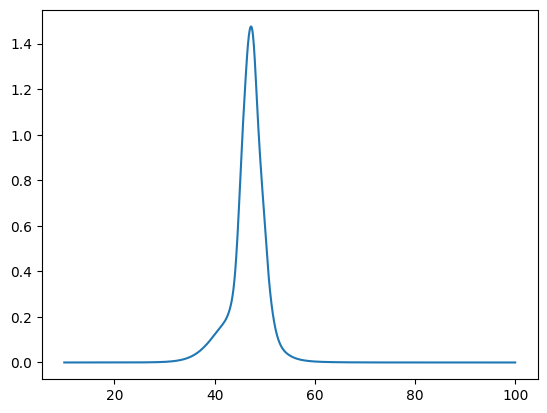

In [11]:
# show its recovered average spectrum
from ismgcc import get_synthetic_average_spectrum_of_one_struct
import numpy as np 
from matplotlib import pyplot as plt

vaxis = np.linspace(10, 100, num=1000) # km / s
rspec = get_synthetic_average_spectrum_of_one_struct(cur_vcdf, vaxis)
plt.plot(vaxis, rspec)

In [12]:
# overlap the recovered spectrum on the raw one
file = "./demo-data/GL14.fits.gz"
u.add_enabled_units(u.def_unit(['K (T_MB)'], represents=u.K)) 
cube = SpectralCube.read(file)

In [13]:
# load the spatial border 
filename = glob("./demo-results/*wcs.reg")[0]
from regions import Regions

regions = Regions.read(filename)
regions[0].meta["text"] 
# the text field contains the structure ID

'serial_id:16 v:22.4'

In [14]:
# it will be convenient to use a dict storing the regions with serial_id1 as the key
def text_to_sid(text):
    return int(text.split(" ")[0].split(":")[1])
    
sid_to_reg = {
    text_to_sid(r.meta["text"]) : r
    for r in regions
}

In [15]:
# the sky region of our interests 
sky_reg = sid_to_reg[sid]

In [16]:
# mask the data cube
mcube = cube.subcube_from_regions([sky_reg])

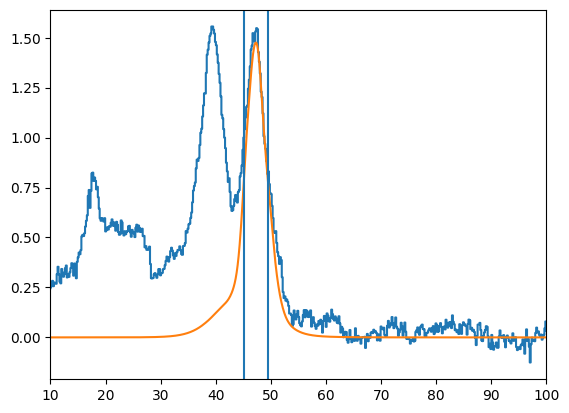

In [17]:
# overlap the raw and recovered average spectrum
x1 = cube.spectral_axis.to(u.km / u.s).value
y1 = mcube.mean(axis=(1, 2)).value # ave spectrum
x2 = vaxis
y2 = rspec

plt.step(x1, y1)
plt.plot(x2, y2)
plt.xlim(np.min(x2), np.max(x2))

# use the half-max value of rspec to define a velocity interval
idx = rspec > rspec.max() / 2
idx_values = np.where(idx)[0]
i1 = np.min(idx_values)
i2 = np.max(idx_values)

plt.axvline(vaxis[i1])
plt.axvline(vaxis[i2])

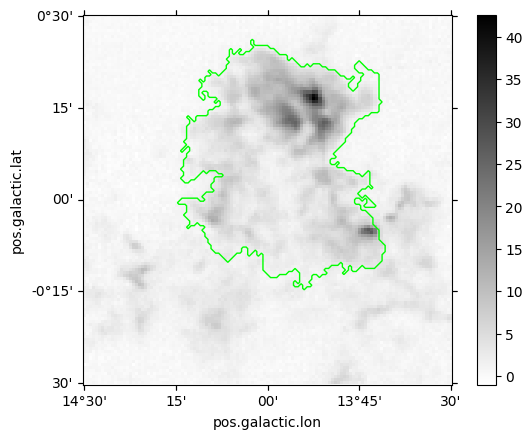

In [18]:
# show the spatial boundary
scube = cube.subcube(zlo=vaxis[i1] * u.km / u.s, zhi=vaxis[i2] * u.km / u.s).with_spectral_unit(u.km / u.s)
m0 = scube.moment0()
plt.subplot(projection=m0.wcs)
plt.imshow(m0.value, cmap="gist_gray_r")
plt.colorbar()
ax = plt.gca()
sky_reg.to_pixel(m0.wcs).plot(ax=ax)

## Other useful utilities 

Beside `get_synthetic_average_spectrum_of_one_struct` used above, there are other useful tools delivered with ISMGCC, including:

- get_recorvered_cube
- get_synthetic_spectra_of_single_pixels
- get_rawcube_cutout_as_recovred_cube
- get_v_lim_by_percentage_of_peak
- get_synthetic_average_spectrum_of_one_struct

In [19]:
from ismgcc import get_recorvered_cube # ...
# ...